# Lê Nguyễn Trung 19146024 
# Bài Tập CNN Vietnamese foods

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import pickle

Chạy file food.ipynb trong VS code để tạo file foods.data -> up file data lên gg drive. 

In [3]:
# tai data tu google drive
def load_data():
    file = open('/content/drive/MyDrive/Data/foods.data', 'rb')
    (pixels, labels) = pickle.load(file)
    file.close()
    print(pixels.shape)
    print(labels.shape)
    return pixels, labels

In [4]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(5510, 128, 128, 3)
(5510, 10)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=50, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)


Epoch 1/50
69/69 [==============================] - 43s 416ms/step - loss: 3.0657 - accuracy: 0.1683 - val_loss: 2.1066 - val_accuracy: 0.2495
Epoch 2/50
69/69 [==============================] - 25s 368ms/step - loss: 2.0059 - accuracy: 0.2976 - val_loss: 1.9134 - val_accuracy: 0.3221
Epoch 3/50
69/69 [==============================] - 27s 389ms/step - loss: 1.8371 - accuracy: 0.3553 - val_loss: 1.8311 - val_accuracy: 0.3367
Epoch 4/50
69/69 [==============================] - 26s 376ms/step - loss: 1.6910 - accuracy: 0.4122 - val_loss: 1.6999 - val_accuracy: 0.4083
Epoch 5/50
69/69 [==============================] - 25s 368ms/step - loss: 1.5524 - accuracy: 0.4648 - val_loss: 1.5070 - val_accuracy: 0.4746
Epoch 6/50
69/69 [==============================] - 26s 371ms/step - loss: 1.4043 - accuracy: 0.5134 - val_loss: 1.5027 - val_accuracy: 0.5009
Epoch 7/50
69/69 [==============================] - 26s 371ms/step - loss: 1.3549 - accuracy: 0.5411 - val_loss: 1.3811 - val_accuracy: 0.5345

In [8]:
model.save('food.h5')


In [24]:
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [25]:
model5=load_model('food.h5')

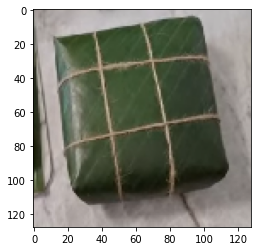

In [27]:
img = cv.imread('/content/banhchung.png')
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
##
img = load_img('/content/banhchung.png',target_size=(128,128))
plt.imshow(img)


In [21]:
class_name = ['banh beo','banh chung', 'banh mi', 'banh pia ','banh xeo','ca kho', 'canh chua','com tam', 'pho', 'xoi xeo']

In [22]:
model_5 = load_model('food.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('banh chung',
 array([3.7786076e-09, 9.9988854e-01, 5.7433134e-08, 6.6800943e-09,
        6.5212564e-09, 7.1043715e-10, 2.1922779e-07, 3.5234704e-11,
        1.0337802e-04, 7.7578115e-06], dtype=float32))